# Pregunta 3: Calidad del Vino

<p>Dentro de las muchas variedades de vino existentes, algunas gustan más que otras, esto es debido al gusto
    de una persona en particular o bien a la gran cantidad de químicos y procesos que se aplican a la producción
    de vino. Para el área de negocios, el estimar cuál es la calidad de un vino en base a la apreciación del público
    es una tarea bastante difícil.
    </p>
    <p>
    Para esta actividad se trabajará con dos datasets asociados a las variantes tinto y blanco del vino portugués
    ”Vinho Verde”. Debido a temas privados solo se cuenta con las caracterísstcas fisioquímicas asociadas a un
    vino en particular, los cuales corresponden a 11 atributos numéricos descritos en el siguiente link.
    Este problema puede ser abordado como clasificación de 11 clases o de regresión, ya que el atributo a estimar,
    quality, es un valor entero entre 0 y 10.</p>

<p> a) Carge los dos dataset en un único dataframe de pandas, además de agregar una columna indicando si
es vino tinto o blanco. Describa el dataset a trabajar.</p>


In [8]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
df_red = pd.read_csv("winequality-red.csv",sep=";")
df_white = pd.read_csv("winequality-white.csv",sep=";")
df_red['tipo'] = 1
df_white['tipo'] = 0
df = pd.concat([df_red,df_white], axis=0)
print (df.info())
print (df.describe())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
tipo                    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434        

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


<p> El dataset a utilizar consta de  6497 ejemplares de ”Vinho Verde”, vino portugués. Se mezclaron dos datasets para formar este conjunto: vino blanco y vino tinto. El dataset cuenta con las siguientes variables: "Fixed acidity", "Volatile acidity", "Citric acid", "Residual sugar", "Chlorides", "Free sulfur dioxide", "Total sulfur dioxide", "Density", "pH", "Sulphates", "Alcohol", variables correspondientes a tipo Float. Además de "Quality" y "Tipo" que son de tipo int, esta última variable fue agregada sintéticamente para determinar si un tipo de vino es tinto (1) o blanco (0). Las variables correspondientes a float son las que van a influir en la medida de que un vino sea de buena calidad o no, la combinación de ellas y sus ciertos valores se reflejan en el indicador "Quality" que va del valor 3 al valor 9 </p>

C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


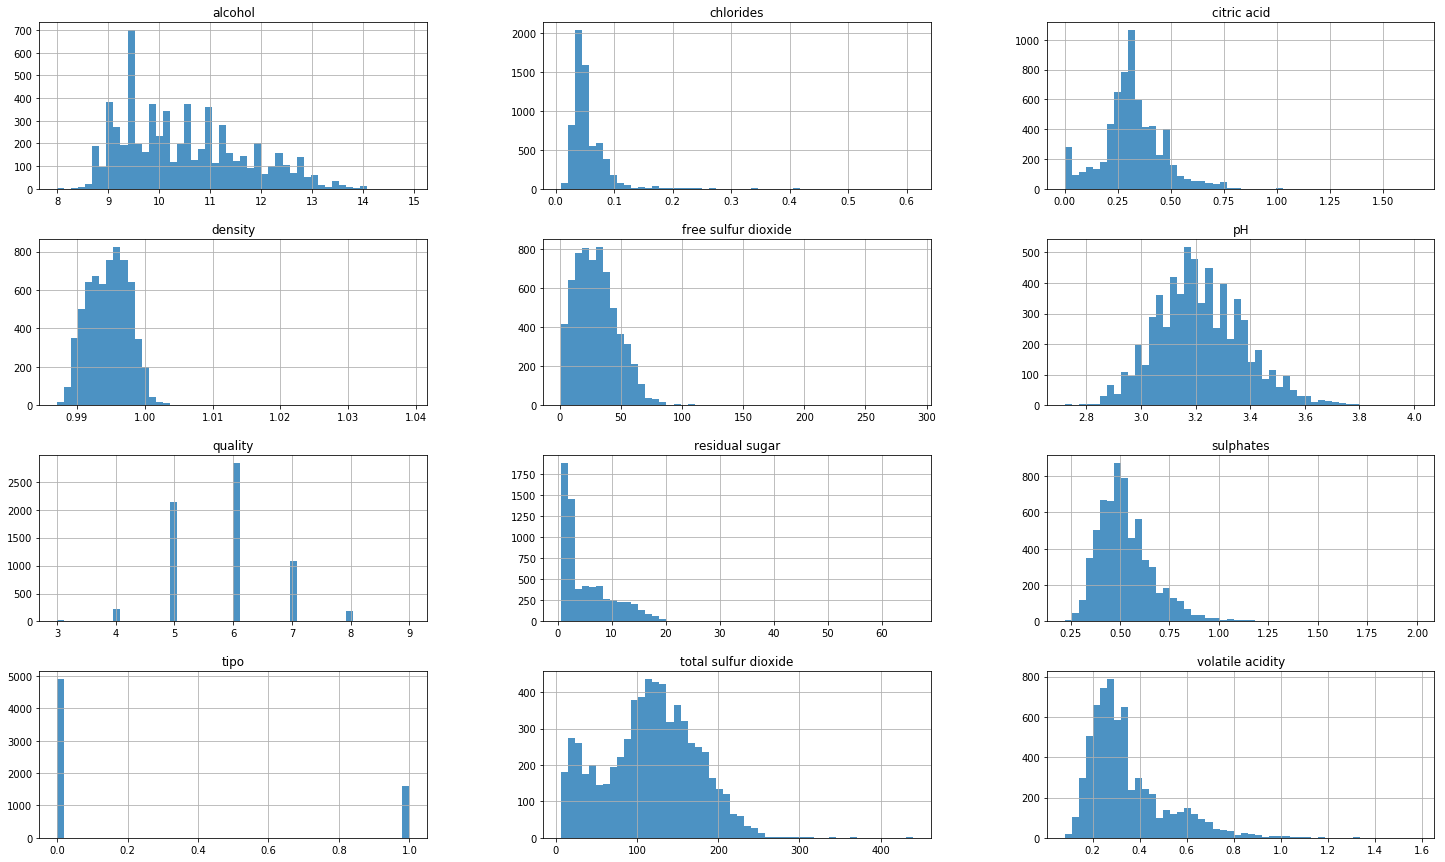

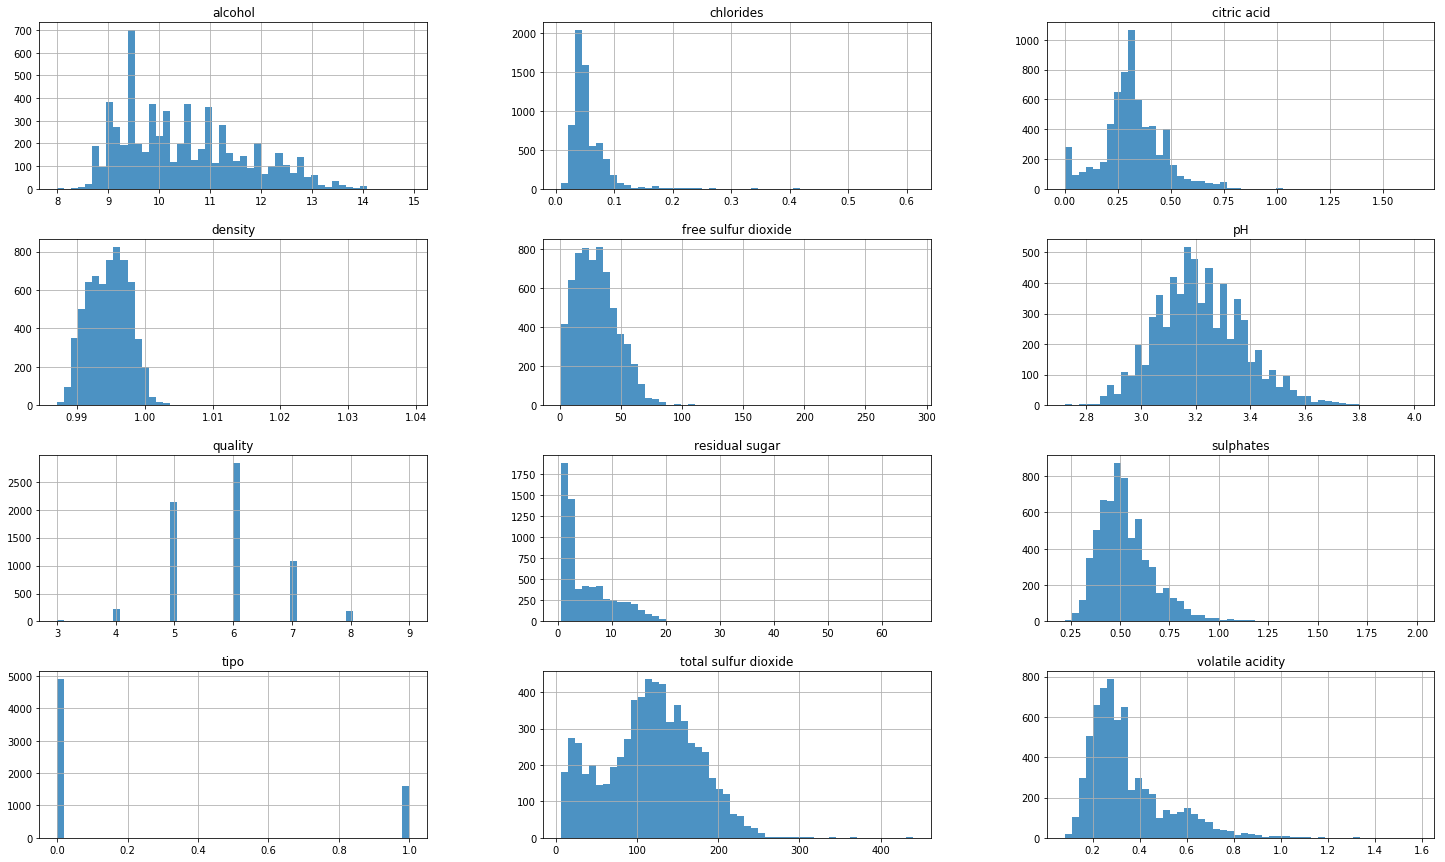

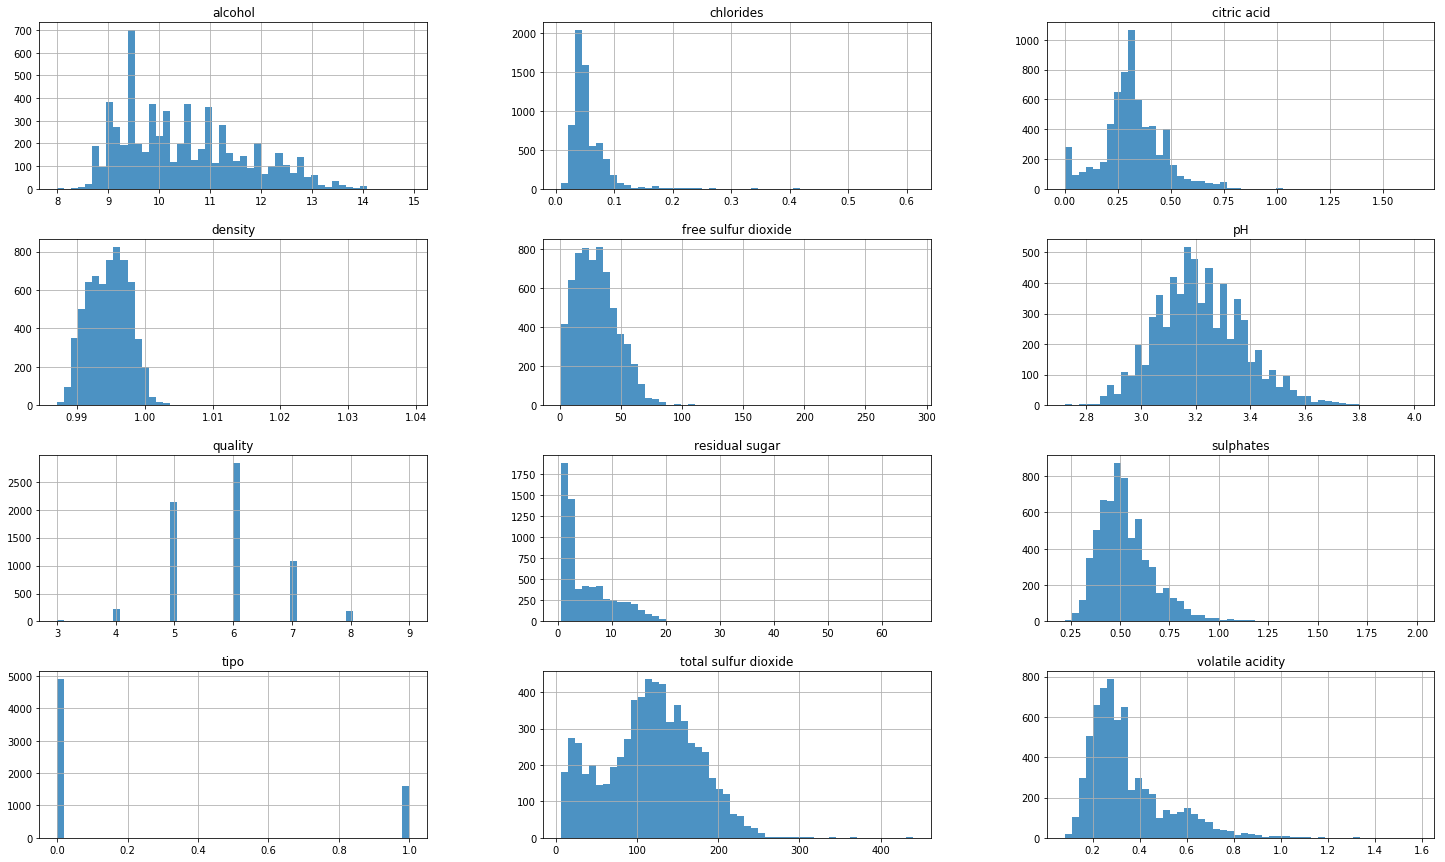

In [5]:
df.ix[:,1:].hist(figsize=(25, 15),alpha=0.8, bins=50)
plt.show()

<p> Los histogramas de las variables nos pueden dar un mayor estudio de nuestro dataset. Por ejemplo, nos muestra que la mayor cantidad de vinos disponibles dentro de la muestra es vino blanco, además que la calidad "quality" predominante dentro del dataset es 6, y muy pocos vinos son los que se concentran posterior a este valor. A pesar de esto, actualmente no se puede decir con certeza cuál o cuáles variables son las que mejor definen la calidad del vino </p>

<p>(b) Aborde este problema como si fuera de clasificación binaria para predecir si un vino es de buena calidad
    o no, es decir, utilice las distintas características fisioquímicas presentes en los datos para estimar esta
    etiqueta. Para esto cree las matrices de entrenamiento y de pruebas, además de la etiqueta para ambos
    conjuntos, considerando como quality mayor a 5 un vino de buena calidad. El conjunto de pruebas
    (25 %) será utilizado únicamente para verificar la calidad de los algoritmos a entrenar.</p>

In [38]:
from sklearn.model_selection import train_test_split
df['good_quality'] = [1 if q>5 else 0 for q in df.quality]#then remove 'quality' from df
df.drop(['quality'])
x_tr = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
               'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
            'sulphates', 'alcohol', 'tipo']]
y_tr =df[['good_quality']]
X_train, x_t, Y_train, y_t = train_test_split(x_tr, y_tr, test_size=0.25, random_state=42)
x_train, x_v, y_train, y_v = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

<p> Al eliminar "Quality" y agregar "Good Quality" podemos trabajar el problema en base a clasificación 0 y 1, en otras palabras, si un vino es de buena calidad o no a raíz de "Quality" > 5. Anteriormente, los histogramas nos mostraban que la mayor parte de los vinos estaban en "Quality" 6, por ende una gran cantidad debería ser clasificada como de buena calidad. </p>

<p> Por otro lado se decidió trabajar con un conjunto de validación del 10%, con el fin de evitar problemas de overfitting entre otros al probar directamente el test sobre las máquinas a entrenar </p>

<p>(c) Entrene un solo Árbol de Clasificación de múltiples niveles para resolver el problema. Puede variar los
    hiper-parámetros que prefiera, recuerde que las decisiones no pueden ser basadas mirando el conjunto
    de pruebas. Debido al desbalanceo que se produce en las dos clases mida la métrica F1-score sobre
    el conjunto de entrenamiento y de pruebas.
    </p>

Score de DTC(Depth =2): 0.768729641694
Score de DTC(Depth =3): 0.768729641694
Score de DTC(Depth =4): 0.796899224806
Score de DTC(Depth =5): 0.791599353796
Score de DTC(Depth =6): 0.789808917197
Score de DTC(Depth =7): 0.802507836991
Score de DTC(Depth =8): 0.8173374613
Score de DTC(Depth =9): 0.796147672552
Score de DTC(Depth =10): 0.778135048232
Score de DTC(Depth =11): 0.790476190476
Score de DTC(Depth =12): 0.798690671031
Score de DTC(Depth =13): 0.805237315876
Score de DTC(Depth =14): 0.788273615635
Score de DTC(Depth =15): 0.806611570248
Score de DTC(Depth =16): 0.797364085667
Score de DTC(Depth =17): 0.800653594771
Score de DTC(Depth =18): 0.798668885191
Score de DTC(Depth =19): 0.803278688525
Score de DTC(Depth =20): 0.809756097561
gini best 0.815503875969
gini random 0.801901743265
Entropy best 0.786440677966
Entropy random 0.803571428571
Gini best sobre Train 0.805970149254


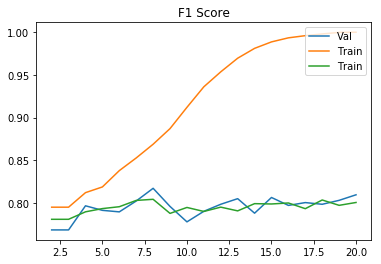

F1-Score test, depth = 8: 0.804672897196


In [30]:
Depths = range(2,21)
errA2=[]
errA=[]
errA3=[]
##VARIANDO MAX DEPTH
from sklearn.tree import DecisionTreeClassifier as DTC
for d in Depths:
    arbol = DTC(max_depth=d)
    arbol.fit(x_train, y_train)
    predTrainDTC = arbol.predict(x_v)
    predTrain2DTC= arbol.predict(x_train)
    predTestDTC = arbol.predict(x_t)
    from sklearn.metrics import f1_score
    errorTrainDTC = f1_score(predTrainDTC, y_v)
    errorTrain2DTC= f1_score(predTrain2DTC,y_train)
    errorTestDTC = f1_score(predTestDTC,y_t)
    print("Score de DTC(Depth ="+str(d)+"): "+str(errorTrainDTC))
    errA2.append(errorTrainDTC)
    errA.append(errorTrain2DTC)
    errA3.append(errorTestDTC)


##Gini
arbol = DTC(max_depth=8,criterion='gini',splitter='best')
arbol.fit(x_train, y_train)
predTrainDTC = arbol.predict(x_v)
print ("gini best "+str(f1_score(predTrainDTC, y_v)))

arbol = DTC(max_depth=8,criterion='gini',splitter='random')
arbol.fit(x_train, y_train)
predTrainDTC = arbol.predict(x_v)
print ("gini random "+str(f1_score(predTrainDTC, y_v)))

##Entropy
arbol = DTC(max_depth=8,criterion='entropy',splitter='best')
arbol.fit(x_train, y_train)
predTrainDTC = arbol.predict(x_v)
print ("Entropy best "+str(f1_score(predTrainDTC, y_v)))

arbol = DTC(max_depth=8,criterion='entropy',splitter='random')
arbol.fit(x_train, y_train)
predTrainDTC = arbol.predict(x_v)
print ("Entropy random "+str(f1_score(predTrainDTC, y_v)))

##Gini Test
arbol = DTC(max_depth=8,criterion='gini',splitter='best')
arbol.fit(x_train, y_train)
predTrainDTC = arbol.predict(x_t)
print ("Gini best sobre Train "+str(f1_score(predTrainDTC, y_t)))

import matplotlib.pyplot as plt
ax = plt.gca()
plt.title('F1 Score')
ax.plot(Depths,errA2,label='Val')
ax.plot(Depths,errA,label='Train')
ax.plot(Depths,errA3,label='Train')
plt.legend(loc=1)
ax.set_xlim(ax.get_xlim()[::1])
plt.show()
arbol = DTC(max_depth=8)
arbol.fit(x_train, y_train)
predTrainDTC = arbol.predict(x_t)
print ("F1-Score test, depth = 8: "+str(f1_score(predTrainDTC, y_t)))


<p> Utilizando la técnica de múltiples niveles, se llega a la conclusión que con una altura de 8  obtiene el mejor resultado sobre el conjunto de validación. De aquí, se probó distintos tipos de algortimos y combinaciones para obtener un mejor resultado. Gini-Best obtuvo el mejor F1-Score con un valor de 0.816 apróximadamente, al probar esta configuración sobre el conjunto de test, se obtuvo un F1-Score de 0.80 aproximadamente, bajó en una escala porcentual  muy pequeña, pero se aseguró de no caer en overfitting. Como se ve en el último gráfico, la curva de entrenamiento tiende a ser 1 desde la altura 15 aproximadamente, mientras que la curva de test y validación no sobrepasan el valor 0.81.

 <p>(d) Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de Random Forest. Varíe la
    cantidad de árboles de decisión utilizados en el ensamblado (n estimators), realice un gráfico resumen
    del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.
    </p>

C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =2): 0.789851603638


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =3): 0.799240626483


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =4): 0.813008130081


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =5): 0.819845857418


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =6): 0.81894934334


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =7): 0.813301662708


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =8): 0.816130580893


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =9): 0.812051649928


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =10): 0.821142048136


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =11): 0.819093078759


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =12): 0.821002386635


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =13): 0.816091954023


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =14): 0.815839694656


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =15): 0.827392120075


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =16): 0.821698113208


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =17): 0.824144486692


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =18): 0.825471698113


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =19): 0.820610687023


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =20): 0.826666666667


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =21): 0.823640661939


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =22): 0.824034334764


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =23): 0.824644549763


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =24): 0.82945368171


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =25): 0.823917137476


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =26): 0.825366777094


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =27): 0.82408724514


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =28): 0.825775656325


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =29): 0.831045906294


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =30): 0.818920210225


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =31): 0.831598864711


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =32): 0.822465492623


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =33): 0.828043581241


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =34): 0.82945368171


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =35): 0.826704545455


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =36): 0.826462128476


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =37): 0.831833254382


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =38): 0.825983878615


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =39): 0.825548141087


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =40): 0.823752969121


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =41): 0.824434824435


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =42): 0.830959164292


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =43): 0.826996197719


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =44): 0.823807274445


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =45): 0.816229116945


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =46): 0.823920265781


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =47): 0.826045627376


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =48): 0.822916666667


C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


Score de Multiple DTC(Depth =49): 0.824644549763


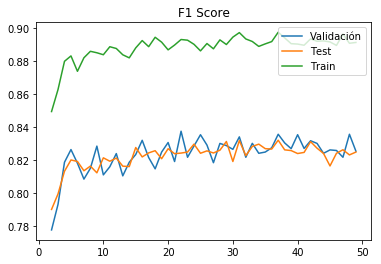

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
Trees = range(2,50)
errA=[]
errA2=[]
errA3=[]
for t in Trees:
    arbol = RandomForestClassifier(n_estimators=t, max_depth=8,n_jobs=-1)
    arbol.fit(x_train, y_train)
    predTrainDTC=arbol.predict(x_train)
    predValDTC = arbol.predict(x_v)
    predTest = arbol.predict(x_t)
    errorTrainDTC =f1_score(predTrainDTC, y_train)
    errorValDTC = f1_score(predValDTC, y_v)
    errorTestDTC = f1_score(predTest, y_t)
    print("Score de Multiple DTC(Depth ="+str(t)+"): "+str(errorTestDTC))
    errA.append(errorTestDTC)
    errA2.append(errorValDTC)
    errA3.append(errorTrainDTC)

import matplotlib.pyplot as plt
ax = plt.gca()
plt.title('F1 Score')
ax.plot(Trees,errA2,label='Validación')
ax.plot(Trees,errA,label='Test')
ax.plot(Trees,errA3,label='Train')
plt.legend(loc=1)
ax.set_xlim(ax.get_xlim()[::1])
plt.show()

<p> Utilizando la ténica de random forest y en base al resultado anterior, se varió la cantidad de árboles a utilizar pero con una altura fija de 8. Se obtuvo el mejor F1-Score con una cantidad de 37 árboles.  Random Forest mejoró los resultados anteriormente obtenidos, debido a que se utiliza una mayor cantidad de clasificadores, los cuales convergen a una solución para el problema. Por otro lado, el valor de la curva de entrenamiento sigue siendo muy alto en comparación a entrenamiento y validación, sin embargo, esta curva ya no llega a 1, lo cual implica que el entrenamiento también mejoró con esta técnica.

 <p>(e) Entrene un ensamblador de árboles de múltiples niveles, mediante la técnica de AdaBoost. Varíe la
    cantidad de árboles de decisión utilizados en el ensamblado (n estimators), realice un gráfico resumen
    del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro. Compare y analice con
    la técnica utilizada en d).
    </p>

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=2: 0.795411089866
F1 Score de Multiple Tree t=3: 0.804222648752
F1 Score de Multiple Tree t=4: 0.79612590799


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=5: 0.805595754945
F1 Score de Multiple Tree t=6: 0.801766437684


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=7: 0.809248554913
F1 Score de Multiple Tree t=8: 0.807135969142


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=9: 0.8193359375
F1 Score de Multiple Tree t=10: 0.817919075145


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=11: 0.824383164006


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=12: 0.813429256595


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=13: 0.81414237936


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=14: 0.825626204239


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=15: 0.81135707411


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=16: 0.818973862536


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=17: 0.821032320309


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=18: 0.818050888142


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=19: 0.821683309558


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=20: 0.819323671498


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=21: 0.821944177093


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=22: 0.830370014416


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=23: 0.82272948033


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=24: 0.826295585413


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=25: 0.825060240964


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=26: 0.821072615093


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=27: 0.825168107589


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=28: 0.822911694511


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=29: 0.821532492726


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=30: 0.829787234043


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=31: 0.822103732429


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=32: 0.830370014416


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=33: 0.846596356663


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=34: 0.826044703596


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=35: 0.843914081146


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=36: 0.822222222222


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=37: 0.831984769158


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=38: 0.829221093372


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=39: 0.836206896552


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=40: 0.834622823985


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=41: 0.843524313914


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=42: 0.837164750958


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=43: 0.840887174542


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=44: 0.830443159923


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=45: 0.831824678418


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=46: 0.835491606715


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=47: 0.835707502374


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=48: 0.828750602991


C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de Multiple Tree t=49: 0.838618078561


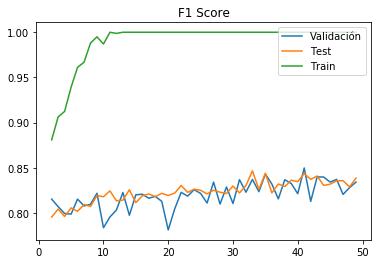

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.metrics import f1_score
Trees = range(2,50)
errA=[]
errA2=[]
errA3=[]
for t in Trees:
    arbol = AdaBoostClassifier(base_estimator=DTC(max_depth=8), n_estimators=t)
    arbol.fit(x_train, y_train)
    predTrainDTC=arbol.predict(x_train)
    predValDTC = arbol.predict(x_v)
    predTest = arbol.predict(x_t)
    errorTrainDTC =f1_score(predTrainDTC, y_train)
    errorValDTC = f1_score(predValDTC, y_v)
    errorTestDTC = f1_score(predTest, y_t)
    print("F1 Score de Multiple Tree t="+str(t)+": "+str(errorTestDTC))
    errA.append(errorTestDTC)
    errA2.append(errorValDTC)
    errA3.append(errorTrainDTC)

import matplotlib.pyplot as plt
ax = plt.gca()
plt.title('F1 Score')
ax.plot(Trees,errA2,label='Validación')
ax.plot(Trees,errA,label='Test')
ax.plot(Trees,errA3,label='Train')
plt.legend(loc=1)
ax.set_xlim(ax.get_xlim()[::1])
plt.show()

<p> Utilizando la técnica de AdaBoost se mejoran aún más los resultados obtenidos anteriormente sobre las curvas de test y validación. El mejor resultado de obtiene con 33 árboles, llegando a un F1-Score de casi 0.85. Esta mejora se produce debido a que AdaBoost utiliza entrenadores débiles que se enfocan principalmente en aquellos casos que están mal clasificados en vez de aquellos que están correctamente clasificados. Aumentando la cantidad de entrenadores se debería mejorar más el resultado, pero puede que computacionalmente sea muy costoso de implementar. El hecho de utilizar estos entrenadores débiles permite ganar un poco de ventaja frente a la ténica utilizada anteriormente. Sin Embargo, la curva de entrenamiento sube abruptamente a 1 a partir de 10 árboles, podría darse la sospecha de overfitting o debido a que estos mismos entrenadores sean débiles que ya se crea que la clasificación se está haciendo de forma correcta. </p>

   <p>(f) Entrene alguna otra máquina de aprendizaje, elegida por usted, para resolver este problema. Elija los
    hiper-par´ametros que estime convenientes intentando aumentar el F1-score obtenido por los algoritmos
    anteriores. Compare y analice estas 4 maneras de resolver el problema definido en b).
    </p>

C:\Users\Fernando\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 Score de LR Cs=0.0001: 0.77833655706
F1 Score de LR Cs=0.01: 0.774193548387
F1 Score de LR Cs=0.1: 0.781961878196
F1 Score de LR Cs=1: 0.788904560414
F1 Score de LR Cs=10: 0.786591123702
F1 Score de LR Cs=100: 0.786761229314
F1 Score de LR Cs=1000: 0.78750591576
F1 Score de LR Cs=10000: 0.786187322611
F1 Score de LR Cs=100000: 0.787133396405
F1 Score de LR Cs=1000000: 0.785815602837
F1 Score de LR Cs=10000000: 0.787907416155


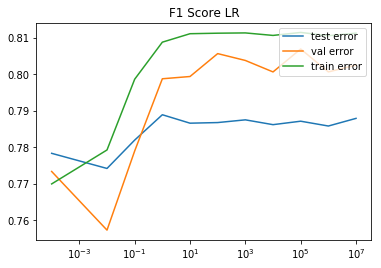

F1 Score de SVM C=0.0001: 0.780945236309
F1 Score de SVM C=0.01: 0.776882993842
F1 Score de SVM C=0.1: 0.785037878788
F1 Score de SVM C=1: 0.794776119403
F1 Score de SVM C=10: 0.793635938231
F1 Score de SVM C=100: 0.795559666975
F1 Score de SVM C=1000: 0.79745106964
F1 Score de SVM C=10000: 0.798372513562


KeyboardInterrupt: 

In [35]:
#LR\
Cs = [0.0001,0.01,0.1,1,10,100,1000,10000,100000,1000000,10000000]
errRL=[]
errRL2=[]
errRL3=[]
from sklearn.linear_model import LogisticRegression
for i in Cs:
    model = LogisticRegression(C=i)
    model.fit(x_train,y_train)
    predTestLR = model.predict(x_t)
    predTrainLR = model.predict(x_train)
    predValLR = model.predict(x_v)
    from sklearn.metrics import f1_score
    errorTrainDTC =f1_score(predTrainLR, y_train)
    errorValDTC = f1_score(predValLR, y_v)
    errorTestDTC = f1_score(predTestLR, y_t)
    print("F1 Score de LR Cs="+str(i)+": "+str(errorTestDTC))
    errRL.append(errorTestDTC)
    errRL2.append(errorValDTC)
    errRL3.append(errorTrainDTC)

import matplotlib.pyplot as plt
ax = plt.gca()
plt.title('F1 Score LR')
ax.plot(Cs,errRL,label='test error')
ax.plot(Cs,errRL2,label='val error')
ax.plot(Cs,errRL3,label='train error')
plt.legend(loc=1)
plt.xscale('log')
ax.set_xlim(ax.get_xlim()[::1])
plt.show()

#SVM\n",
errSVM=[]
errSVM2=[]
errSVM3=[]
from sklearn.svm import SVC
for i in Cs:
    clf = SVC(C=i, kernel='linear')
    clf.fit(x_train, y_train)
    predTestSVM = clf.predict(x_t)
    predTrainSVM = clf.predict(x_train)
    predValSVM = clf.predict(x_v)
    errorTestSVM = f1_score(predTestSVM,y_t)
    errorTrainSVM = f1_score(predTrainSVM,y_train)
    errorValSVM = f1_score(predValSVM,y_v)
    print("F1 Score de SVM C="+str(i)+": "+str(errorTestSVM))
    errSVM.append(errorTestSVM)
    errSVM2.append(errorValSVM)
    errSVM3.append(errorTrainSVM)
    
ax = plt.gca()
plt.title('F1 Score SVM')
ax.plot(Cs,errSVM,label='test error')
ax.plot(Cs,errSVM2,label='val error')
ax.plot(Cs,errSVM3,label='Train error')
plt.legend(loc=1)
plt.xscale('log')
ax.set_xlim(ax.get_xlim()[::1])
plt.show()

<p> Se decidió optar por modelos de Regresión Logística y SVM con kernel lineal para este apartado debido a que se obtienen buenos resultados en problemas de clasificación como éste. Sin embargo, ninguno de los dos métodos superó el valor obtenido por AdaBoost (0.85) ni por RandomForest (0.83). Probablemente variando más parámetros de estos algoritmos se puedan obtener mejores resultados. Comparando los 4 métodos utilizados, los multiples entrenadores fueron aquellos que encontraron mejores resultados para el problema debido a que al tener una mayor cantidad de entrenadores, estos pueden converger a un mejor resultado para el problema. SVM y LR por sí solos son buenos algoritmos, pero multiples árboles convergieron a una mejor solución. </p>

<p>(g) Defina un criterio para estimar la importancia de los distintos atributos en el ensamblado de Random
    Forest, implementelo sobre alguno de los ensambladores entrenados en d), haga un ranking de
    importancia de atributos ¿Es posible implementar este criterio sobre una técnica de boost como lo es
    AdaBoost
    </p>


In [47]:
arbol = RandomForestClassifier(n_estimators=37,criterion="gini",max_depth=8,n_jobs=-1,random_state=1)
arbol.fit(x_tr,y_tr)
n = 1
for i in arbol.feature_importances_ :
    print("Atributo %d: %f"%(n,i))
    n += 1

C:\Users\Fernando\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Atributo 1: 0.045305
Atributo 2: 0.145948
Atributo 3: 0.063092
Atributo 4: 0.054794
Atributo 5: 0.077727
Atributo 6: 0.068408
Atributo 7: 0.064270
Atributo 8: 0.140198
Atributo 9: 0.042445
Atributo 10: 0.064475
Atributo 11: 0.229917
Atributo 12: 0.003421


In [46]:
best = [11,8,2]
n = 1
print("Top atributos")
for i in best:
    print("Atributo %d:"%(n)+list(x_tr)[i])
    n += 1

Top atributos
Atributo 1:tipo
Atributo 2:pH
Atributo 3:citric acid


<p> Según el ensamblado de Random Forest, los 3 atributos más importantes para decidir la calidad de un vino serían el tipo (tinto o blanco), el pH y el ácido cítrico de éste. Sería complicado aplicar esta técnica con AdaBoost, debido a que la elección realizada para la clasificación no es la misma que en RandomForest. El realizar elecciones en base a los ejemplares que estén mal clasificados puede significar que no todos los clasificadores estén de acuerdo en el atributo que se le esté dando mayor importancia. </p>